# Проект 2. Разведывательный анализ данных
Задача: построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы

Цель: освоить первичный анализ данных, научиться инструментами 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

students = pd.read_csv('stud_math.csv')

In [ ]:
def fill_null(x):
    ''' заполним пустые значения модой или медианой'''
    for i in x.columns:
        if x[i].dtype == object:
            x[i] = x[i].fillna(x[i].mode()[0])
        else:
            x[i] = x[i].fillna(x[i].median())
    return x



### Первичный анализ данных в столбцах.

In [113]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [91]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

есть пропуски в данных

### school школа

In [6]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


все значения заполнены

### sex пол ученика

In [7]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


все значения заполнены

### age возраст ученика (от 15 до 22)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

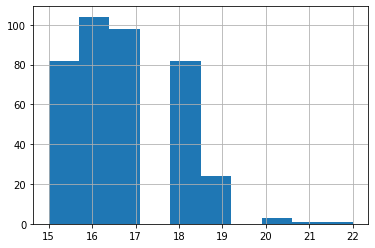

In [8]:
students.age.hist()
students.age.describe()

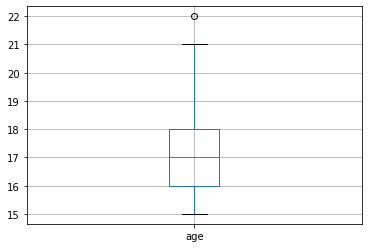

In [95]:
boxplot = students.boxplot(column=['age'])

все значения заполнены, выброс попадает в допустимые значения

### address адрес 'U' - городской, 'R' - за городом

In [184]:
display(pd.DataFrame(students.address.value_counts()))
students.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- есть пропуски в значениях

### famsize — размер семьи
('LE3' <= 3, 'GT3' >3)

In [17]:
display(pd.DataFrame(students.famsize.value_counts()))
students.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- есть пропуски значений

### Pstatus — статус совместного жилья родителей 
('T' - живут вместе 'A' - раздельно)

In [20]:
display(pd.DataFrame(students.Pstatus.value_counts()))
students.loc[:, ['Pstatus']].info()

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- статус не всех учеников известен 

### образование родителей
**Medu — образование матери**<br>
**Fedu — образование отца**<br>
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

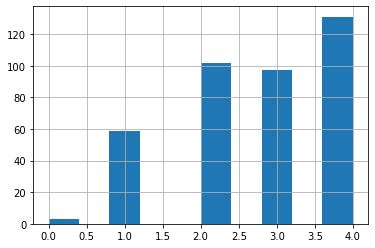

In [149]:
students.Medu.hist()
display(students.Medu.describe())

- есть пропуски , данные заполнены качествено, выбросов нет, высшее образование превалирует

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

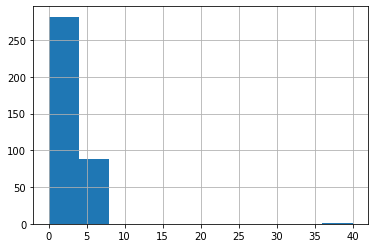

In [99]:
students.Fedu.hist()
display(students.Fedu.describe())

In [69]:
students[students.Fedu == students.Fedu.max()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


- присутствует выброс

### работа родителей
**Mjob — работа матери**<br>
**Fjob — работа отца**<br>
('teacher' - учитель, 'health' - сфера здравоохранения, 
'services' - гос служба, 'at_home' - не работает, 'other' - другое)

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


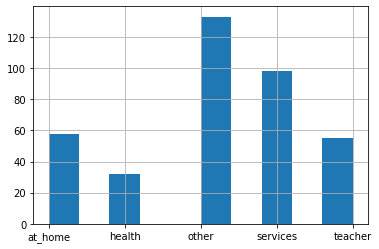

In [71]:
students.Mjob.hist()
display(pd.DataFrame(students.Mjob.value_counts()))
students.loc[:, ['Mjob']].info()

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


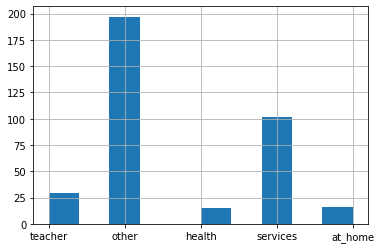

In [72]:
students.Fjob.hist()
display(pd.DataFrame(students.Fjob.value_counts()))
students.loc[:, ['Fjob']].info()

### reason — причина выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


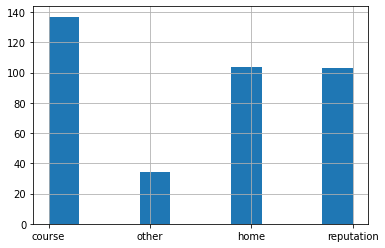

In [73]:
students.reason.hist()
display(pd.DataFrame(students.reason.value_counts()))
students.loc[:, ['reason']].info()

- есть пустые значения

### guardian — опекун 
('mother' - мать, 'father' - отец, 'other' - другое)

In [74]:
display(pd.DataFrame(students.guardian.value_counts()))
students.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


- есть пустые значения

### traveltime — время в пути до школы
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) 

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

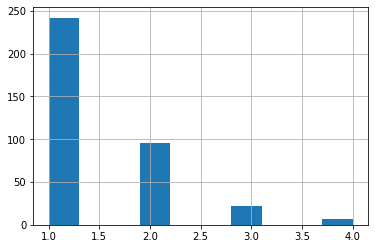

In [100]:
students.traveltime.hist()
display(students.traveltime.describe())

- большинство учеников живёт рядом со школой, есть пустые значения

### studytime — время на учёбу помимо школы в неделю
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

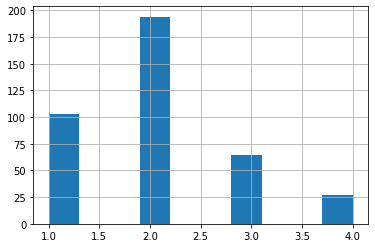

In [188]:
students.studytime.hist()
display(students.studytime.describe())

### failures — количество внеучебных неудач 
(n, если 1<=n<=3, иначе 0)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

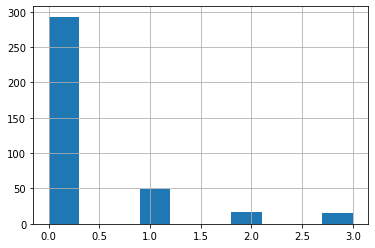

In [189]:
students.failures.hist()
students.failures.describe()

### schoolsup — дополнительная образовательная поддержка 
(yes или no)

In [78]:
display(pd.DataFrame(students.schoolsup.value_counts()))
students.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### famsup — семейная образовательная поддержка 
(yes или no)

In [79]:
display(pd.DataFrame(students.famsup.value_counts()))
students.loc[:, ['famsup']].info()

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### paid — дополнительные платные занятия по математике 
(yes или no)

In [80]:
display(pd.DataFrame(students.paid.value_counts()))
students.loc[:, ['paid']].info()

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### activities — дополнительные внеучебные занятия 
(yes или no)

In [81]:
display(pd.DataFrame(students.activities.value_counts()))
students.loc[:, ['activities']].info()

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### nursery — посещал детский сад 
(yes или no)

In [82]:
display(pd.DataFrame(students.nursery.value_counts()))
students.loc[:, ['nursery']].info()

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### higher — хочет получить высшее образование 
(yes или no)

In [83]:
display(pd.DataFrame(students.higher.value_counts()))
students.loc[:, ['higher']].info()

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### internet — наличие интернета дома 
(yes или no)

In [84]:
display(pd.DataFrame(students.internet.value_counts()))
students.loc[:, ['internet']].info()

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### romantic — в романтических отношениях 
(yes или no)

In [86]:
display(pd.DataFrame(students.romantic.value_counts()))
students.loc[:, ['romantic']].info()

,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### famrel — семейные отношения 
(от 1 - очень плохо до 5 - очень хорошо)

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

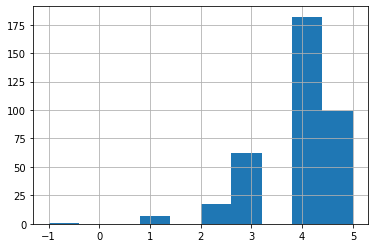

In [87]:
students.famrel.hist()
students.famrel.describe()

- есть значение не входящее в допустимый диапазон

In [66]:
students[students["famrel"] == -1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


### freetime — свободное время после школы 
(от 1 - очень мало до 5 - очень мого)

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

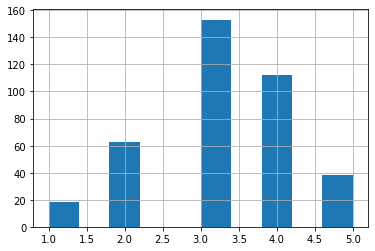

In [88]:
students.freetime.hist()
students.freetime.describe()

### goout — проведение времени с друзьями 
(от 1 - очень мало до 5 - очень много)

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

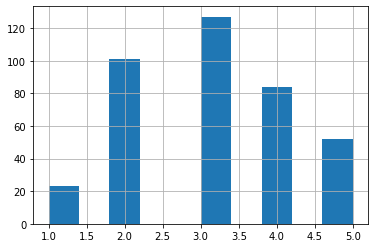

In [90]:
students.goout.hist()
students.goout.describe()

### health — текущее состояние здоровья 
(от 1 - очень плохо до 5 - очень хорошо)

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

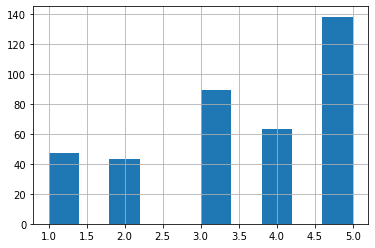

In [92]:
students.health.hist()
students.health.describe()

### absences — количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

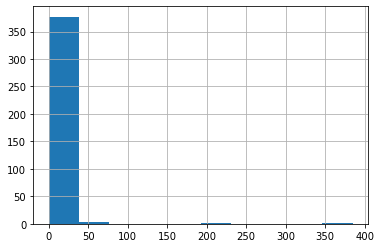

In [102]:
students.absences.hist()
display(students.absences.describe())

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


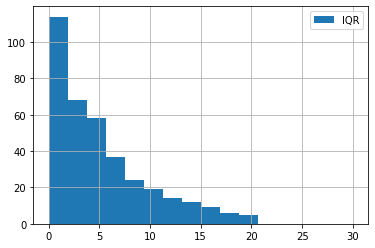

In [109]:
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
l_wisker = perc25 - 1.5*IQR
r_wisker = perc75 + 1.5*IQR

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=l_wisker, l=r_wisker))

students.absences.loc[students.absences.between(
    l_wisker, r_wisker)].hist(bins=16, range=(0, 30), label='IQR')


plt.legend()

- есть выбросы

### studytime, granular 
?????

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

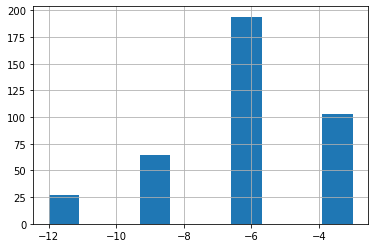

In [110]:
students["studytime, granular"].hist()
display(students["studytime, granular"].describe())

#### score — баллы по госэкзамену по математике

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


None

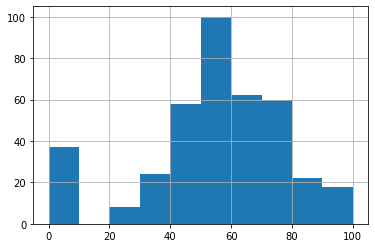

In [192]:
students.score.hist()
display(students.score.describe())
display(students.loc[:, ['score']].info())

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


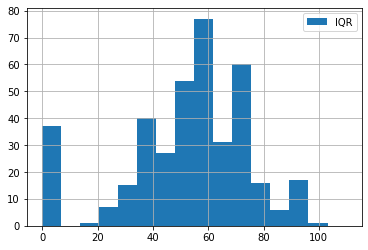

In [112]:
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
l_wisker = perc25 - 1.5*IQR
r_wisker = perc75 + 1.5*IQR

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=l_wisker, l=r_wisker))

students.score.loc[students.score.between(
    l_wisker, r_wisker)].hist(bins=16, range=(0, 110), label='IQR')


plt.legend()

In [194]:
display(pd.DataFrame(students.score.value_counts()))

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


- есть пустые значения

### Анализ 
далее поработаем с копией датасета

In [195]:
df = students.copy()

заменим пустые значения в score на 0 и удалим все строки с нулевым значением

In [198]:
df.score = df.score.fillna(0)
df = df[df.score > 0]

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   352 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


None

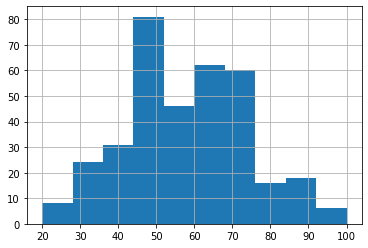

In [199]:
df.score.hist()
display(df.score.describe())
display(df.loc[:, ['score']].info())

заменим все пропущенные значения в остальных столбцах

In [200]:
df = fill_null(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              352 non-null    object 
 4   famsize              352 non-null    object 
 5   Pstatus              352 non-null    object 
 6   Medu                 352 non-null    float64
 7   Fedu                 352 non-null    float64
 8   Mjob                 352 non-null    object 
 9   Fjob                 352 non-null    object 
 10  reason               352 non-null    object 
 11  guardian             352 non-null    object 
 12  traveltime           352 non-null    float64
 13  studytime            352 non-null    float64
 14  failures             352 non-null    float64
 15  schoolsup            352 non-null    obj

заменим yes/no на числовые значения

In [202]:
df.schoolsup = df.schoolsup.eq('yes').mul(1)
df.famsup = df.famsup.eq('yes').mul(1)
df.paid = df.paid.eq('yes').mul(1)
df.activities = df.activities.eq('yes').mul(1)
df.nursery = df.nursery.eq('yes').mul(1)
df.higher = df.higher.eq('yes').mul(1)
df.internet = df.internet.eq('yes').mul(1)
df.romantic = df.romantic.eq('yes').mul(1)
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,0,1,1,1,1,-9.0,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0,0,0,0,1,-6.0,1,1,0,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,1,1,0,0,1,-6.0,1,0,0,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,1,0,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,GT3,T,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,5.0,1.0,5.0,0.0,75.0


избавимся от выбросов

In [203]:
df = df[df.Fedu <= 4]
df = df[df.famrel > 0]

IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
l_wisker = perc25 - 1.5*IQR
r_wisker = perc75 + 1.5*IQR

df = df.loc[df.absences.between(l_wisker, r_wisker)]

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               323 non-null    object 
 1   sex                  323 non-null    object 
 2   age                  323 non-null    int64  
 3   address              323 non-null    object 
 4   famsize              323 non-null    object 
 5   Pstatus              323 non-null    object 
 6   Medu                 323 non-null    float64
 7   Fedu                 323 non-null    float64
 8   Mjob                 323 non-null    object 
 9   Fjob                 323 non-null    object 
 10  reason               323 non-null    object 
 11  guardian             323 non-null    object 
 12  traveltime           323 non-null    float64
 13  studytime            323 non-null    float64
 14  failures             323 non-null    float64
 15  schoolsup            323 non-null    int

## корреляционный анализ

In [205]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.135335,-0.137296,0.104331,-0.002389,0.215763,-0.260260,-0.136472,-0.015234,-0.142203,-0.109657,0.002389,-0.187954,-0.118336,0.156238,0.069616,0.016848,0.145551,-0.033763,0.195435,-0.139067
Medu,-0.135335,1.000000,0.587823,-0.161028,0.090708,-0.211448,-0.039805,0.204643,0.119955,0.132350,0.166331,-0.090708,0.217688,0.210753,0.043418,-0.012721,0.043082,0.052516,-0.038445,0.093441,0.190408
Fedu,-0.137296,0.587823,1.000000,-0.158574,-0.004837,-0.287890,0.070026,0.218809,0.080164,0.105423,0.158792,0.004837,0.164560,0.178307,0.037243,-0.025128,0.012372,0.018984,0.011639,-0.012506,0.135505
traveltime,0.104331,-0.161028,-0.158574,1.000000,-0.106727,0.103528,0.009359,-0.017088,-0.034338,-0.003818,-0.037391,0.106727,-0.092965,-0.084840,0.063439,-0.037804,0.016909,0.044491,-0.013293,-0.043007,-0.078356
studytime,-0.002389,0.090708,-0.004837,-0.106727,1.000000,-0.148787,0.010717,0.136491,0.229647,0.081963,0.085935,-1.000000,0.156585,0.085239,0.055415,0.037088,-0.135061,-0.017669,-0.081276,-0.045655,0.138126
failures,0.215763,-0.211448,-0.287890,0.103528,-0.148787,1.000000,0.081165,-0.053259,-0.147684,-0.061830,-0.101711,0.148787,-0.356891,-0.110405,0.084223,0.024255,0.125234,0.101132,0.072242,0.163813,-0.283299
schoolsup,-0.260260,-0.039805,0.070026,0.009359,0.010717,0.081165,1.000000,0.087944,-0.041288,0.095908,0.036036,-0.010717,0.024804,0.010302,-0.007951,0.014332,-0.070436,-0.036620,-0.029693,0.006405,-0.272139
famsup,-0.136472,0.204643,0.218809,-0.017088,0.136491,-0.053259,0.087944,1.000000,0.258644,-0.000642,0.041932,-0.136491,0.109927,0.078229,0.020114,0.010851,0.061673,0.002366,0.035375,0.004459,-0.045459
paid,-0.015234,0.119955,0.080164,-0.034338,0.229647,-0.147684,-0.041288,0.258644,1.000000,0.022869,0.113170,-0.229647,0.158103,0.151445,0.087272,-0.006237,-0.046995,0.045178,-0.062340,-0.082752,0.021261
activities,-0.142203,0.132350,0.105423,-0.003818,0.081963,-0.061830,0.095908,-0.000642,0.022869,1.000000,0.030377,-0.081963,-0.002544,0.076068,-0.000299,0.060720,0.078087,0.004403,0.003602,0.052426,0.045080


<AxesSubplot:>

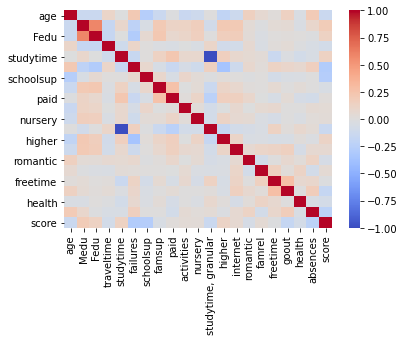

In [206]:
sns.heatmap(df.corr(), cmap='coolwarm')

видна корреляция между столбцами "studytime" и "studytime, granular" избавимся от второго

In [207]:
df.drop(['studytime, granular'], inplace=True, axis=1)

образование родителей тоже достаточно скоррелированы между собой, уберём один из них

In [208]:
df.drop(['Medu'], inplace=True, axis=1)

## анализ номинативных переменных

In [210]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

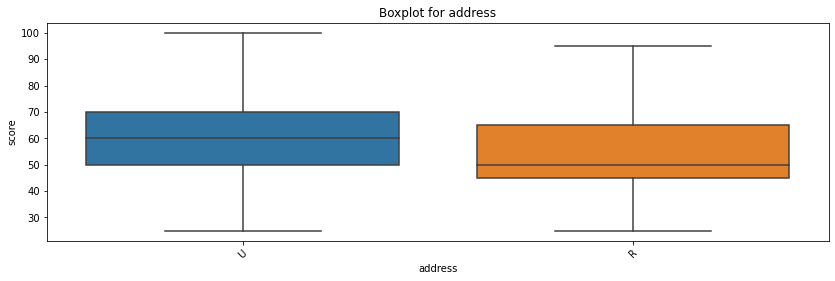

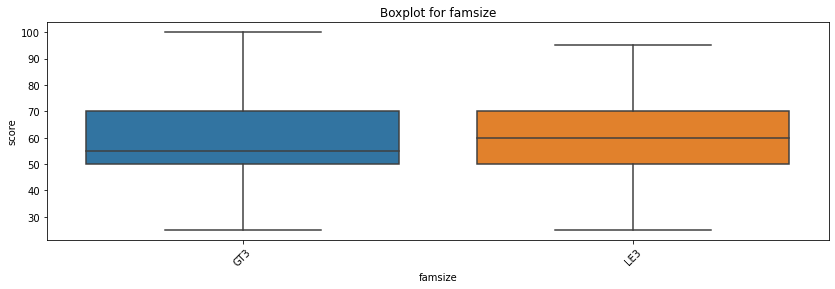

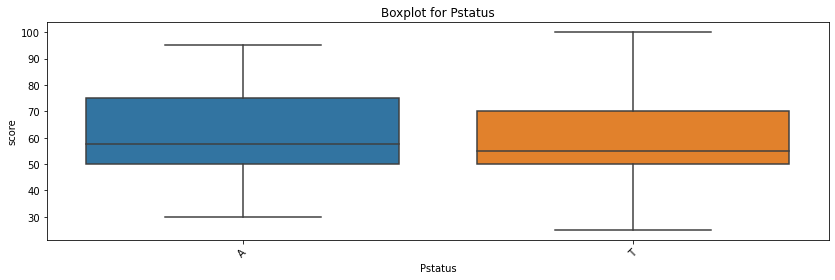

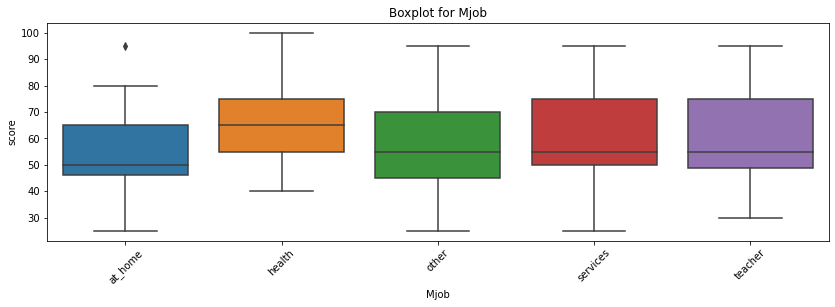

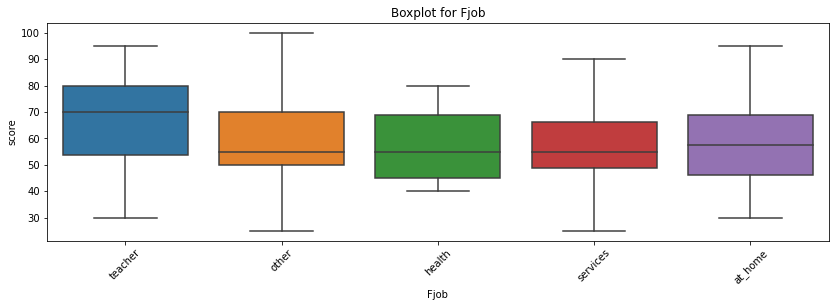

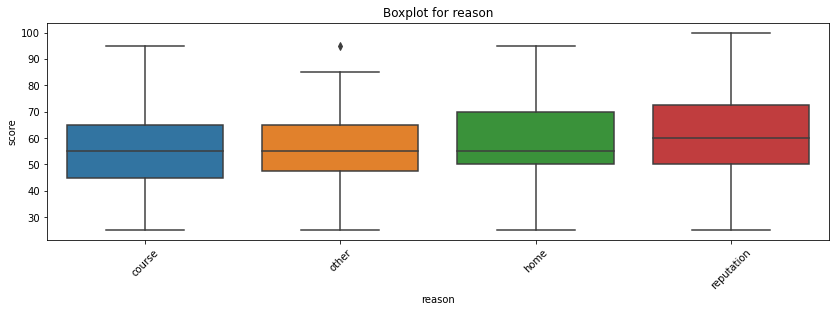

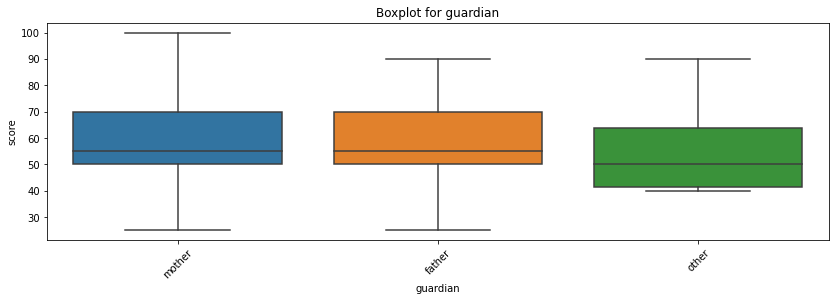

In [211]:
for col in ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col)

In [212]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [213]:
for col in ['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob


для модели будут отобраны столбцы address и Mjob

## Выводы
- В данных достаточно мало пустых значений.
- Выбросы найдены только в столбцах **Fedu** (образование отц), **famrel** (семейные отношения), **absences** (количество пропущенных занятий).<br>
Это позволяет сделать вывод о том, что данные достаточно чистые.


- присутствует корреляция параметров **Fedu** и **Medu** и **studytime** и **studytime, granular**.
- среди номенативных переменных статистически значимых различий не показали **famsize**, **Pstatus**, **Fjob**, **reason** и  **guardian**<br>
Эти столбцы не войдут в модель

### готовим модель

In [224]:
model = students.copy()

In [225]:
model.score = model.score.fillna(0)
model = model[model.score > 0]
model = fill_null(model)
model.drop(['studytime, granular'], inplace=True, axis=1)
model.drop(['Medu'], inplace=True, axis=1)
model.drop(['famsize'], inplace=True, axis=1)
model.drop(['Pstatus'], inplace=True, axis=1)
model.drop(['Fjob'], inplace=True, axis=1)
model.drop(['reason'], inplace=True, axis=1)
model.drop(['guardian'], inplace=True, axis=1)

In [228]:
model.drop(['score'], inplace=True, axis=1)

In [232]:
model = model[model.Fedu <= 4]
model = model[model.famrel > 0]

IQR = model.absences.quantile(0.75) - model.absences.quantile(0.25)
perc25 = model.absences.quantile(0.25)
perc75 = model.absences.quantile(0.75)
l_wisker = perc25 - 1.5*IQR
r_wisker = perc75 + 1.5*IQR

model = model.loc[model.absences.between(l_wisker, r_wisker)]

In [233]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 394
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      323 non-null    object 
 1   sex         323 non-null    object 
 2   age         323 non-null    int64  
 3   address     323 non-null    object 
 4   Fedu        323 non-null    float64
 5   Mjob        323 non-null    object 
 6   traveltime  323 non-null    float64
 7   studytime   323 non-null    float64
 8   failures    323 non-null    float64
 9   schoolsup   323 non-null    object 
 10  famsup      323 non-null    object 
 11  paid        323 non-null    object 
 12  activities  323 non-null    object 
 13  nursery     323 non-null    object 
 14  higher      323 non-null    object 
 15  internet    323 non-null    object 
 16  romantic    323 non-null    object 
 17  famrel      323 non-null    float64
 18  freetime    323 non-null    float64
 19  goout       323 non-null    f

In [234]:
model

,school,sex,age,address,Fedu,Mjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences
0,GP,F,18,U,4.0,at_home,2.0,2.0,0.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0
1,GP,F,17,U,1.0,at_home,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0
2,GP,F,15,U,1.0,at_home,1.0,2.0,3.0,yes,no,no,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0
3,GP,F,15,U,2.0,health,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0
4,GP,F,16,U,3.0,other,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,1.0,teacher,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0
391,MS,M,17,U,1.0,services,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0
392,MS,M,21,R,1.0,other,1.0,1.0,3.0,no,no,no,no,no,yes,no,no,5.0,5.0,3.0,3.0,3.0
393,MS,M,18,R,2.0,services,3.0,1.0,0.0,no,no,no,yes,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0
